Acknowledgment to the poster of this data set. Username 'fedesoriano' from [Kaggle.com](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

Here is a comprehensive list of the columns in this dataset and their corresponding meanings. The following list is directly copy/pasted from the original user's post.

 - *id:* unique identifier
 - *gender:* "**Male**", "**Female**" or "**Other**"
 - *age:* age of the patient
 - *hypertension:* **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
 - *heart_disease:* **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
 - *ever_married:* "**No**" or "**Yes**"
 - *work_type:* "**children**", "**Govt_jov**", "**Never_worked**", "**Private**" or "**Self-employed**"
 - *Residence_type:* "**Rural**" or "**Urban**"
 - *avg_glucose_level:* average glucose level in blood
 - *bmi:* body mass index
 - *smoking_status:* "**formerly smoked**", "**never smoked**", "**smokes**" or "**Unknown**"
 - *stroke:* **1** if the patient had a stroke or **0** if not

*Note:* "Unknown" in smoking_status means that the information is unavailable for this patient

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, f1_score, plot_confusion_matrix, accuracy_score, precision_score, recall_score

In [47]:
df = pd.read_csv('PredictStrokes/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [48]:
#This is just to rename the columns because I don't like underscores
df = df.rename(columns = {'heart_disease': 'heartDisease'})
df = df.rename(columns = {'ever_married': 'everMarried'})
df = df.rename(columns = {'work_type': 'workType'})
df = df.rename(columns = {'Residence_type': 'residenceType'})
df = df.rename(columns = {'avg_glucose_level': 'avgGlucoseLevel'})
df = df.rename(columns = {'smoking_status': 'smokingStatus'})

In [49]:
len(df['id'])

5110

## First look at the data
First thing I noticed is that this data set seem pretty small. 5,110 records. I don't have much room to remove data so I'll need to avoid that as much as possible.

Let's check for anything that might cause problems in our data.

In [50]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heartDisease         0
everMarried          0
workType             0
residenceType        0
avgGlucoseLevel      0
bmi                201
smokingStatus        0
stroke               0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5110 non-null   int64  
 1   gender           5110 non-null   object 
 2   age              5110 non-null   float64
 3   hypertension     5110 non-null   int64  
 4   heartDisease     5110 non-null   int64  
 5   everMarried      5110 non-null   object 
 6   workType         5110 non-null   object 
 7   residenceType    5110 non-null   object 
 8   avgGlucoseLevel  5110 non-null   float64
 9   bmi              4909 non-null   float64
 10  smokingStatus    5110 non-null   object 
 11  stroke           5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [53]:
df['everMarried'].value_counts()

Yes    3353
No     1757
Name: everMarried, dtype: int64

In [54]:
df['workType'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: workType, dtype: int64

In [55]:
df['residenceType'].value_counts()

Urban    2596
Rural    2514
Name: residenceType, dtype: int64

In [56]:
df['smokingStatus'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smokingStatus, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5110 non-null   int64  
 1   gender           5110 non-null   object 
 2   age              5110 non-null   float64
 3   hypertension     5110 non-null   int64  
 4   heartDisease     5110 non-null   int64  
 5   everMarried      5110 non-null   object 
 6   workType         5110 non-null   object 
 7   residenceType    5110 non-null   object 
 8   avgGlucoseLevel  5110 non-null   float64
 9   bmi              4909 non-null   float64
 10  smokingStatus    5110 non-null   object 
 11  stroke           5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Here are some places where I see some problems.
 - BMI has 201 records with missing info.
 - gender, hypertension, heartDisease, everMarried, residenceType, and stroke look like their a bianary classification. Simply a 'yes' or 'no' answer. No reason we can't make it a '1' or a '0'
 - workType and smokingStatus seems to be broken up into categories. I see no reason why we couldn't use a category encoder.
 - 'id' may cause noise in our data so let's remove that column to avoid it.

## Cleaning the data
Let's go through each one and start to solve the problems that come up, starting with dealing with the NaN values in BMI. Our records only have about 5,000 records to start with so removing 201 records is a lot of data being removed. The safest thing to do without swkeing the data is to take an average of everything in this column and fill in the NaN's with the average.

In [58]:
df = df.fillna(df.mean())
df.isna().sum()

id                 0
gender             0
age                0
hypertension       0
heartDisease       0
everMarried        0
workType           0
residenceType      0
avgGlucoseLevel    0
bmi                0
smokingStatus      0
stroke             0
dtype: int64

Sweet. Simple and clean, like my favorite song. Next, let's deal with the columns that could be a binary answer. Since hyptertension, heartDisease, and stroke are already binary 1's and 0's we can leave them alone. Let's deal with gender and everMarried

In [59]:
df

,id,gender,age,hypertension,heartDisease,everMarried,workType,residenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [60]:
#These are the lists vlaues we want replaced
genderList = ['Male', 'Female']
marriedList = ['No', 'Yes']
residenceList = ['Urban', 'Rural']

In [61]:
#This function takes in a list of old values to find,
# and the specific column name we wish to apply this function to.
#What it returns is the modified df with the column was spcified,
#turned into a binary classification.

def makeBinary(oldList, columnName):
    binaryList = [0, 1]
    newVals = dict(zip(oldList, binaryList))
    return df[columnName].replace(newVals, inplace = True)

makeBinary(genderList, 'gender')

In [62]:
df['gender'].value_counts()

1        2994
0        2115
Other       1
Name: gender, dtype: int64

Shoots, almost. We missed one. Fortunately, removing one row isn't that big a deal, let's just drop them.

In [63]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [64]:
df['gender'].value_counts()

1    2994
0    2115
Name: gender, dtype: int64

Success! Next is married. Second verse, same as the first. We'll apply the makeBinary function to the everMarried column the same way, with the marriedList we set aside earlier.

In [65]:
makeBinary(marriedList, 'everMarried')

In [66]:
df

,id,gender,age,hypertension,heartDisease,everMarried,workType,residenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


In [67]:
df['everMarried'].value_counts()

1    3353
0    1756
Name: everMarried, dtype: int64

In [68]:
makeBinary(residenceList, 'residenceType')

In [69]:
df['residenceType'].value_counts()

0    2596
1    2513
Name: residenceType, dtype: int64

Success again! Lastly, let's drop 'id' and let's move on to starting our model!

In [70]:
df = df.drop(['id'], axis = 1)

# Step 1: Testing different model types
In this section we'll test and fit a number of different models onto our data to see which one's make the most sense and give us the best predictions in our results. We're not just looking at how good our scores are but how accurate our models are from the start.

**Note:** When we start to look at our model, 0's will represent a "No" meaning "This patient has *not* had a stroke before."

1's will represent "Yes" meaning "This patient *has* had a stroke before.

In [71]:
df

,gender,age,hypertension,heartDisease,everMarried,workType,residenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,0,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,1,202.21,28.893237,never smoked,1
2,0,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1
3,1,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1
4,1,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,Private,0,83.75,28.893237,never smoked,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,1,Private,1,166.29,25.600000,formerly smoked,0


In [72]:
#Data Prep

#Scales my data
scaler = StandardScaler()
#Ecoder to categorize onto cols 'workType' and 'smokingStatus'
encoder = ce.CountEncoder(cols = ['workType', 'smokingStatus'])

xCols = [c for c in df.columns.to_list() if c not in ['stroke']]

x = df[xCols]
y = df['stroke']

xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, test_size=0.33, random_state=42)

xTrainEncoded = encoder.fit_transform(xTrain)
xTestEncoded = encoder.transform(xTest)

xTrainScaled = scaler.fit_transform(xTrainEncoded)
xTestScaled = scaler.transform(xTestEncoded)

C:\Users\jpake\anaconda3\envs\learn-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Accuracy Train Score: 0.7449605609114811
Accuracy Test Score: 0.7354685646500593
-----
F1-Train Score: 0.22399999999999998
F1-Test Score: 0.24915824915824913
-----
Precision Train Score: 0.12962962962962962
Precision Test Score: 0.14859437751004015
-----
Recall Train Score: 0.8235294117647058
Recall Test Score: 0.7708333333333334
-----
0 is "Not at risk of a stroke"
1 is "At risk of a stroke"


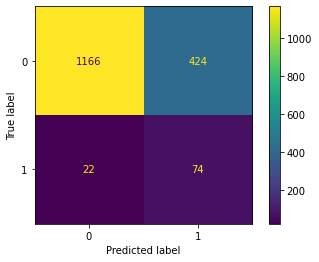

In [73]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state = 123, class_weight = 'balanced')
logReg.fit(xTrainScaled, yTrain)

yPredTrain = logReg.predict(xTrainScaled)
yPredTest = logReg.predict(xTestScaled)

plot_confusion_matrix(logReg, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")
print('-----')
print('0 is "Not at risk of a stroke"')
print('1 is "At risk of a stroke"')

Accuracy Train Score: 0.8051416885772714
Accuracy Test Score: 0.7823250296559905
-----
F1-Train Score: 0.2866310160427808
F1-Test Score: 0.2525458248472505
-----
Precision Train Score: 0.17135549872122763
Precision Test Score: 0.1569620253164557
-----
Recall Train Score: 0.8758169934640523
Recall Test Score: 0.6458333333333334
-----
0 is "Not at risk of a stroke"
1 is "At risk of a stroke"


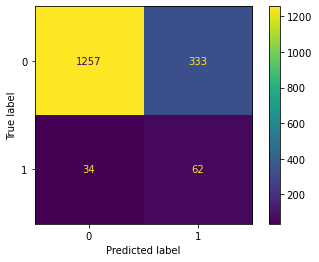

In [74]:
from sklearn.svm import SVC

clf = SVC(random_state=0, class_weight = 'balanced')
clf.fit(xTrainScaled, yTrain)

yPredTrain = clf.predict(xTrainScaled)
yPredTest = clf.predict(xTestScaled)

plot_confusion_matrix(clf, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")
print('-----')
print('0 is "Not at risk of a stroke"')
print('1 is "At risk of a stroke"')

Accuracy Train Score: 0.8740870581361379
Accuracy Test Score: 0.8606168446026097
-----
F1-Train Score: 0.21493624772313297
F1-Test Score: 0.24920127795527158
-----
Average Precision Train Score: 0.14898989898989898
Average Precision Test Score: 0.17972350230414746
-----
Recall Train Score: 0.38562091503267976
Recall Test Score: 0.40625
-----
0 is "Not at risk of a stroke"
1 is "At risk of a stroke"


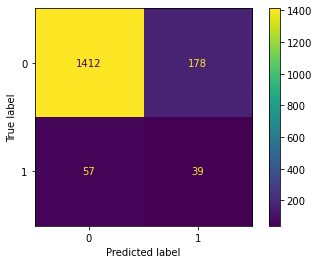

In [75]:
from sklearn.naive_bayes import GaussianNB

gauNB = GaussianNB()
gauNB.fit(xTrainScaled, yTrain)

yPredTrain = gauNB.predict(xTrainScaled)
yPredTest = gauNB.predict(xTestScaled)

plot_confusion_matrix(gauNB, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Average Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Average Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")
print('-----')
print('0 is "Not at risk of a stroke"')
print('1 is "At risk of a stroke"')

Accuracy Train Score: 1.0
Accuracy Test Score: 0.9157769869513642
-----
F1-Train Score: 1.0
F1-Test Score: 0.15476190476190474
-----
Average Precision Train Score: 1.0
Average Precision Test Score: 0.18055555555555555
-----
Recall Train Score: 1.0
Recall Test Score: 0.13541666666666666
-----
0 is "Not at risk of a stroke"
1 is "At risk of a stroke"


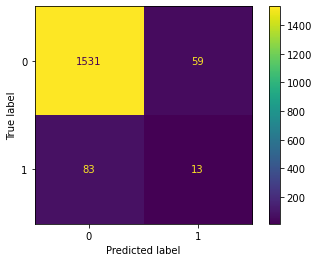

In [76]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(class_weight='balanced')

decTree.fit(xTrainScaled, yTrain)

yPredTrain = decTree.predict(xTrainScaled)
yPredTest = decTree.predict(xTestScaled)

plot_confusion_matrix(decTree, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Average Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Average Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")
print('-----')
print('0 is "Not at risk of a stroke"')
print('1 is "At risk of a stroke"')

Accuracy Train Score: 1.0
Accuracy Test Score: 0.9430604982206405
-----
F1-Train Score: 1.0
F1-Test Score: 0.0
-----
Average Precision Train Score: 1.0
Average Precision Test Score: 0.0
-----
Recall Train Score: 1.0
Recall Test Score: 0.0
-----
0 is "Not at risk of a stroke"
1 is "At risk of a stroke"


C:\Users\jpake\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


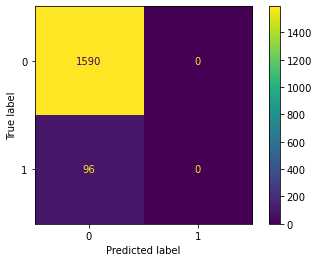

In [77]:
from sklearn.ensemble import RandomForestClassifier
rngForest = RandomForestClassifier(class_weight='balanced')

rngForest.fit(xTrainScaled, yTrain)

yPredTrain = rngForest.predict(xTrainScaled)
yPredTest = rngForest.predict(xTestScaled)

plot_confusion_matrix(rngForest, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Average Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Average Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")
print('-----')
print('0 is "Not at risk of a stroke"')
print('1 is "At risk of a stroke"')

In [78]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [79]:
#XGBClassifier doesn't have a function to automatically balance imbalanced
#datasets so we need to find out what number to give as the weight.
#scale_pos_weight = total_negative_examples (not stroke) / total_positive_examples (stroke)
4860/249

19.518072289156628

Accuracy Train Score: 0.9997078586035641
Accuracy Test Score: 0.928232502965599
-----
F1-Train Score: 0.9967426710097721
F1-Test Score: 0.18791946308724836
-----
Average Precision Train Score: 0.9935064935064936
Average Precision Test Score: 0.2641509433962264
-----
Recall Train Score: 1.0
Recall Test Score: 0.14583333333333334
-----
0 is "Not at risk of a stroke"
1 is "At risk of a stroke"


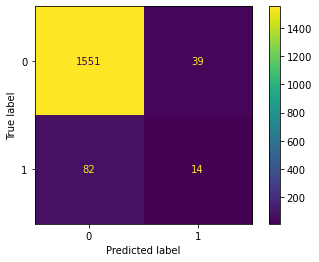

In [80]:
import xgboost as xgb
xgbClass = xgb.XGBClassifier(scale_pos_weight = 19.518072289156628)

xgbClass.fit(xTrainScaled, yTrain)

yPredTrain = xgbClass.predict(xTrainScaled)
yPredTest = xgbClass.predict(xTestScaled)

plot_confusion_matrix(xgbClass, xTestScaled, yTest)

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Average Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Average Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")
print('-----')
print('0 is "Not at risk of a stroke"')
print('1 is "At risk of a stroke"')

Moving forward after experimenting with a few different model types, I've chosen RandomForestClassifier. Using a decision tree model as apposed to a regression model fits with this data better as most of the data in this set seems to be mostly binary, with a few acceptions. As for Specifically RandomForestClassifier as apposed to say XGBClassification, while XGBC did seem to have a better score result due to learning the data better, RandomForestClassifier's documentaiton was more descriptive and lended itself better to be run multitudes of times to inch closer to a more accurate model.

# Model 1: Commitment to RandomForestClassifier

Time for feature engineering with RandomForestClassifier! Let's make a second model for this and name it something different for, just for the sake of oganization.

Accuracy Train Score: 0.8445807770961146
Accuracy Test Score: 0.8309608540925267
-----
F1-Train Score: 0.22222222222222224
F1-Test Score: 0.23592493297587133
-----
Average Precision Train Score: 0.1431261770244821
Average Precision Test Score: 0.1588447653429603
-----
Recall Train Score: 0.49673202614379086
Recall Test Score: 0.4583333333333333


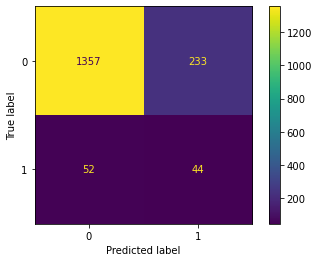

In [81]:
rngForest2 = RandomForestClassifier(class_weight='balanced',
                                    max_depth=None,
                                    n_estimators=100,
                                    min_samples_split=20,
                                    min_samples_leaf=20,
                                    min_weight_fraction_leaf=0.497,
                                    random_state = 123,
                                    max_features = 'auto',
                                    max_leaf_nodes = 100,
                                    min_impurity_decrease = 0,
                                    n_jobs = 1000
                                    )

rngForest2.fit(xTrainScaled, yTrain)

yPredTrain = rngForest2.predict(xTrainScaled)
yPredTest = rngForest2.predict(xTestScaled)

plot_confusion_matrix(rngForest2, xTestScaled, yTest)
# The bellow text field is only for grabbing images, doesn't need to be run every time
# plt.savefig('images/Models/Model1.png')

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Average Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Average Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")

So, as we've seen already our test model is dramatically too over fit and doesn't learn the data well. The above model is the result of maticulously itterating through each parameter in RandomForestClassifier and inching towards a more properly fit model.

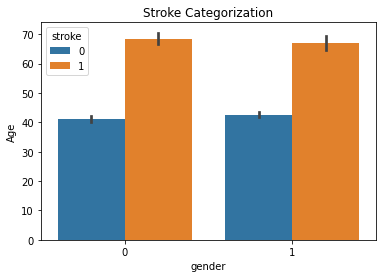

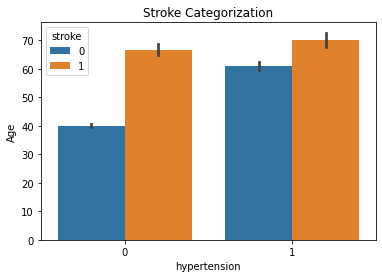

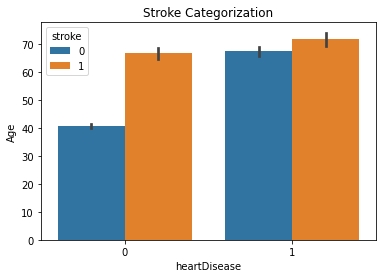

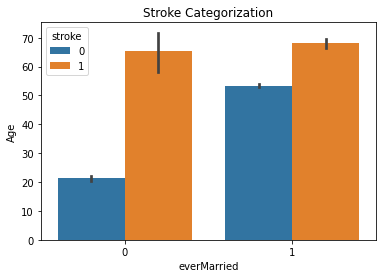

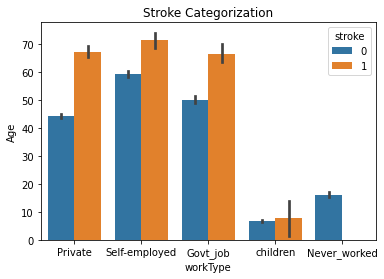

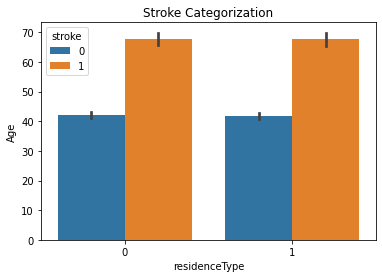

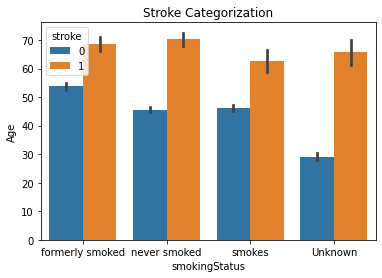

<Figure size 432x288 with 0 Axes>

In [82]:
import matplotlib.pyplot as plt

disCols = [c for c in df.columns.to_list() if c not in ['stroke', 'age', 'avgGlucoseLevel', 'bmi']]


for x in disCols:
    sns.barplot(x = df[x], y = df['age'], hue = df['stroke'])
    plt.title(f'Age Vs. {x} categorized by Stroke')
    plt.xlabel(x)
    plt.ylabel('Age')
    plt.title('Stroke Categorization')
    # The bellow text field is only for grabbing images, doesn't need to be run every time
    # plt.savefig(f'images/ageImages/Age Vs. {x} categorized by Stroke.png')
    plt.show()
    plt.clf()

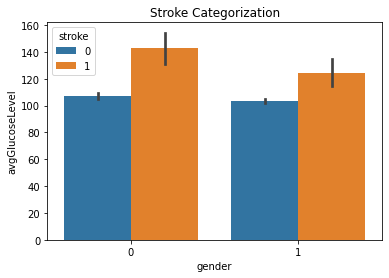

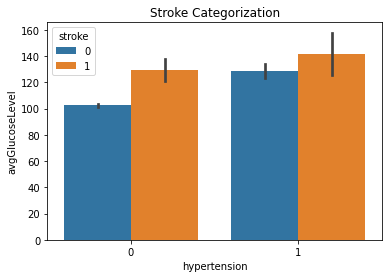

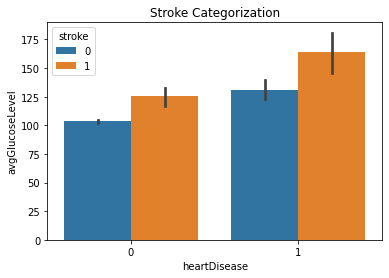

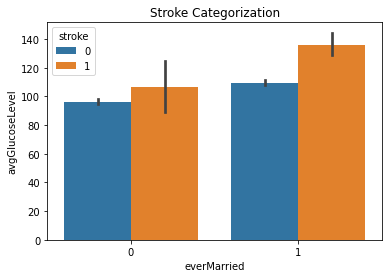

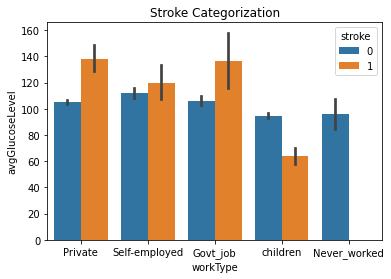

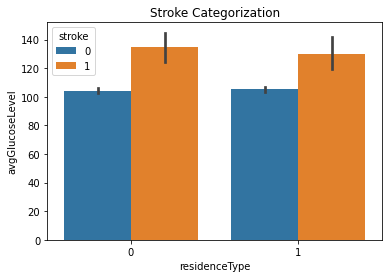

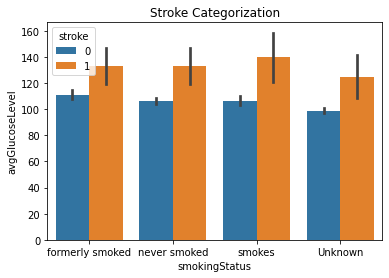

<Figure size 432x288 with 0 Axes>

In [83]:
for x in disCols:
    sns.barplot(x = df[x], y = df['avgGlucoseLevel'], hue = df['stroke'])
    plt.title(f'avgGlucoseLevel Vs. {x} categorized by Stroke')
    plt.xlabel(x)
    plt.ylabel('avgGlucoseLevel')
    plt.title('Stroke Categorization')
    # The bellow text field is only for grabbing images, doesn't need to be run every time
    # plt.savefig(f'images/avgGlucoseLevelImages/avgGlucoseLevel Vs. {x} categorized by Stroke.png')
    plt.show()
    plt.clf()

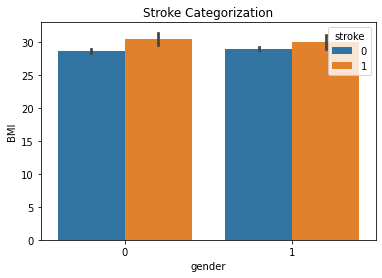

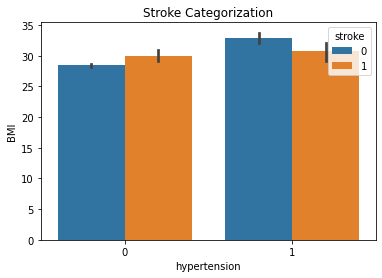

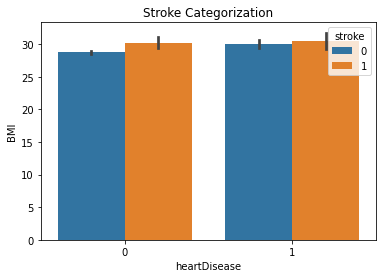

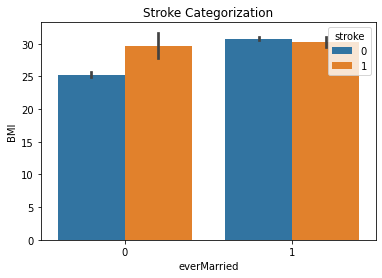

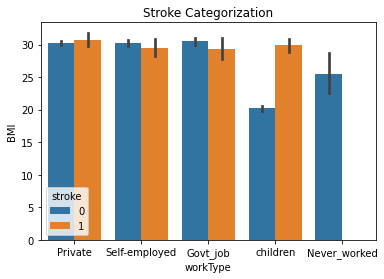

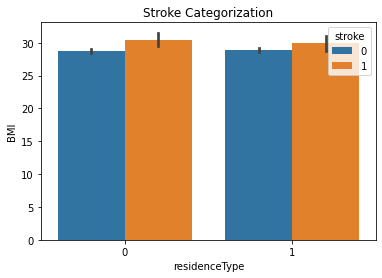

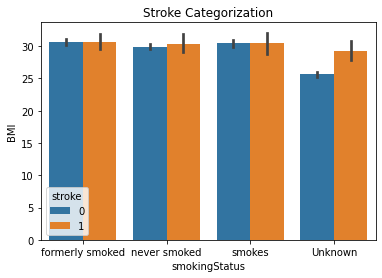

<Figure size 432x288 with 0 Axes>

In [84]:
for x in disCols:
    sns.barplot(x = df[x], y = df['bmi'], hue = df['stroke'])
    plt.title(f'BMI Vs. {x} categorized by Stroke')
    plt.xlabel(x)
    plt.ylabel('BMI')
    plt.title('Stroke Categorization')
    # The bellow text field is only for grabbing images, doesn't need to be run every time
    # plt.savefig(f'images/bmiImages/BMI Vs. {x} categorized by Stroke.png')
    plt.show()
    plt.clf()

In [85]:
# Returns a list of most important features
y = 0
while y < 10:
    imp = rngForest2.feature_importances_
    var = [x for x in xCols]
    print(var[y], imp[y])
    y+=1

gender 0.0
age 0.24242424242424243
hypertension 0.0
heartDisease 0.0
everMarried 0.0
workType 0.0
residenceType 0.0
avgGlucoseLevel 0.7272727272727273
bmi 0.030303030303030304
smokingStatus 0.0


avgGlucoseLevel looks like it has the biggest impact on health so lets take a closer look ath that.

In [86]:
strokeDF = df[(df['stroke'] == 1)]
strokeDF 
notStrokeDF = df[(df['stroke'] == 0)]

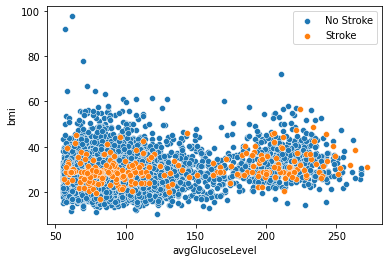

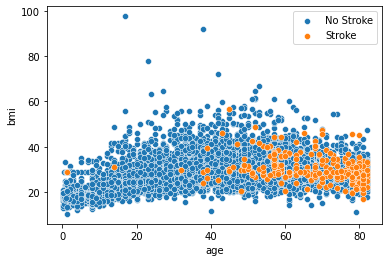

<Figure size 432x288 with 0 Axes>

In [87]:
sns.scatterplot(x = df.avgGlucoseLevel[df.stroke == 0], y = df.bmi[df.stroke==0])
sns.scatterplot(x = df.avgGlucoseLevel[df.stroke == 1], y = df.bmi[df.stroke==1])
plt.legend(['No Stroke', 'Stroke'])
# The bellow text field is only for grabbing images, doesn't need to be run every time
plt.savefig(f'images/futureWorkExamples/bmi_vs_avgGlucoseLevel.png')
plt.show()
plt.clf()

sns.scatterplot(x = df.age[df.stroke == 0], y = df.bmi[df.stroke==0])
sns.scatterplot(x = df.age[df.stroke == 1], y = df.bmi[df.stroke==1])
plt.legend(['No Stroke', 'Stroke'])
# The bellow text field is only for grabbing images, doesn't need to be run every time
plt.savefig(f'images/futureWorkExamples/bmi_vs_age.png')
plt.show()
plt.clf()

In [88]:
age = 30
strokeAge = strokeDF[(strokeDF['age'] < age)]
strokesAgeFilters = strokeAge.age.value_counts().sum()
strokesAgeAll = strokeDF.age.value_counts().sum()
print(f'strokesAgeFilters: {strokesAgeFilters}')
print(f'strokesAgeAll: {strokesAgeAll}')
print(f'% of number of strokes above the age of {age}: {(((strokesAgeFilters/strokesAgeAll)*100)-100)*-1}%')

strokesAgeFilters: 2
strokesAgeAll: 249
% of number of strokes above the age of 30: 99.19678714859438%


# Model 2: Gridsearch

While model 1 was a good 'quick and dirty' start, using GridSearchCV will bring us as close as possible to making the an accurate model by using machine learning to run multiple models to find the best possible combination of hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

rngForest3 = RandomForestClassifier()

param = {'max_depth': [5, 10],
         'min_samples_split': [10, 20], 
         'class_weight': ['balanced_subsample', 'balanced'],
         'n_estimators': [100,  500],
         'min_samples_split': [10, 20],
         'min_samples_leaf': [10, 20],
         'n_jobs': [100, 500],
         'min_weight_fraction_leaf': [.1, .2, .3, .4, .497]}
scoring = ('recall', 'accuracy')
clf = GridSearchCV(rngForest3,
                   param, 
                   scoring=scoring, refit = 'recall')

clf.fit(xTrainScaled, yTrain)

Exception in thread Thread-24002:
Traceback (most recent call last):
  File "C:\Users\jpake\anaconda3\envs\learn-env\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\jpake\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\process_executor.py", line 555, in run
    result_item, is_broken, bpe = self.wait_result_broken_or_wakeup()
  File "C:\Users\jpake\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\process_executor.py", line 609, in wait_result_broken_or_wakeup
    ready = wait(readers + worker_sentinels)
  File "C:\Users\jpake\anaconda3\envs\learn-env\lib\multiprocessing\connection.py", line 879, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\jpake\anaconda3\envs\learn-env\lib\multiprocessing\connection.py", line 811, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 101


Accuracy Train Score: 0.6792287467134093
Accuracy Test Score: 0.6702253855278766
-----
F1-Train Score: 0.19970845481049562
F1-Test Score: 0.22562674094707522
-----
Average Precision Train Score: 0.11238720262510254
Average Precision Test Score: 0.1302250803858521
-----
Recall Train Score: 0.8954248366013072
Recall Test Score: 0.84375


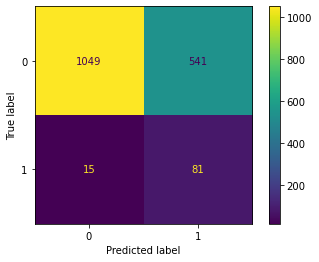

In [103]:
bestEst = clf.best_estimator_

yPredTrain = bestEst.predict(xTrainScaled)
yPredTest = bestEst.predict(xTestScaled)

plot_confusion_matrix(bestEst, xTestScaled, yTest)
# The bellow text field is only for grabbing images, doesn't need to be run every time
# plt.savefig('images/Models/Model1.png')

print(f"Accuracy Train Score: {accuracy_score(yTrain, yPredTrain)}")
print(f"Accuracy Test Score: {accuracy_score(yTest, yPredTest)}")
print('-----')
print(f"F1-Train Score: {f1_score(yTrain, yPredTrain)}")
print(f"F1-Test Score: {f1_score(yTest, yPredTest)}")
print('-----')
print(f"Average Precision Train Score: {precision_score(yTrain, yPredTrain)}")
print(f"Average Precision Test Score: {precision_score(yTest, yPredTest)}")
print('-----')
print(f"Recall Train Score: {recall_score(yTrain, yPredTrain)}")
print(f"Recall Test Score: {recall_score(yTest, yPredTest)}")

In [89]:
df.describe()

,age,hypertension,heartDisease,everMarried,residenceType,avgGlucoseLevel,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,0.656293,0.491877,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,0.474991,0.499983,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


After playing around with the features for a while, I've settled on this for the moment. This seems to be the sweet spot in the overall accuracy of my model. Though it wasn't the highest percentile score I was able to acheive, it has the msot minimal false negative predicitons. In the case of predicting someone health and the amount of medical attention, it's better to over predicit if someone needs help than to underpredict it.

This model will essentially:
 - Predict 84.4% if a patient will or will not be at risk of a stroke correctly.
 - Only a minimal Aprox. 3.1% of patients predicted to be 'not at risk' will be misdiagnosed
 - Model has been made to air on the side of caution and over predict risk as opposed to underpredict.

The use case I see this model being most useful for is for family phasicians and general practitioners having a way knowing if the patients they receive are at risk of a stroke being onset later in life. This model can be used for a new patient or garnering a list of current patients inorder to service them better. Calls can be made on behalf of the practitioners to inform patients that they may be at risk and a check up/consultation may be in benefitial.

It should also be noted that while this model can be made to be more accurate be reducing the ranges that the model can predict on (such as only including date on patients over the age of 30) this is ultimately unwise due to the nature of medicine and the targeted use case for this model being general practitioners. Being that General practitioners see all body types from all walks of life, cherry picking patient information would be self desrtuctive.